In [7]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
# Generate a 2D dataset for visualisation
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=1.5,
    random_state=42
)

In [11]:
# Print dataset information
print("Dataset: Synthetic binary classification dataset (make_classification)")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")

Dataset: Synthetic binary classification dataset (make_classification)
Number of samples: 500
Number of features: 2
Number of classes: 2


In [13]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [15]:
# Define solvers to compare
# lbfgs: Fast for large datasets, supports L2 regularisation
# liblinear: Good for small datasets, supports L1 and L2
# sag: Stochastic Average Gradient, good for large datasets
# saga: Similar to sag, but supports L1 penalty as well
solvers = ['lbfgs', 'liblinear', 'sag', 'saga']
results = {}

In [17]:
# Train and evaluate each solver
for solver in solvers:
    model = LogisticRegression(solver=solver, max_iter=500, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[solver] = {
        'model': model,
        'accuracy': acc
    }

In [19]:
# Print accuracy scores for each solver
for solver, data in results.items():
    print(f"Solver: {solver:9s} | Accuracy: {data['accuracy']:.3f}")

Solver: lbfgs     | Accuracy: 0.913
Solver: liblinear | Accuracy: 0.913
Solver: sag       | Accuracy: 0.913
Solver: saga      | Accuracy: 0.913


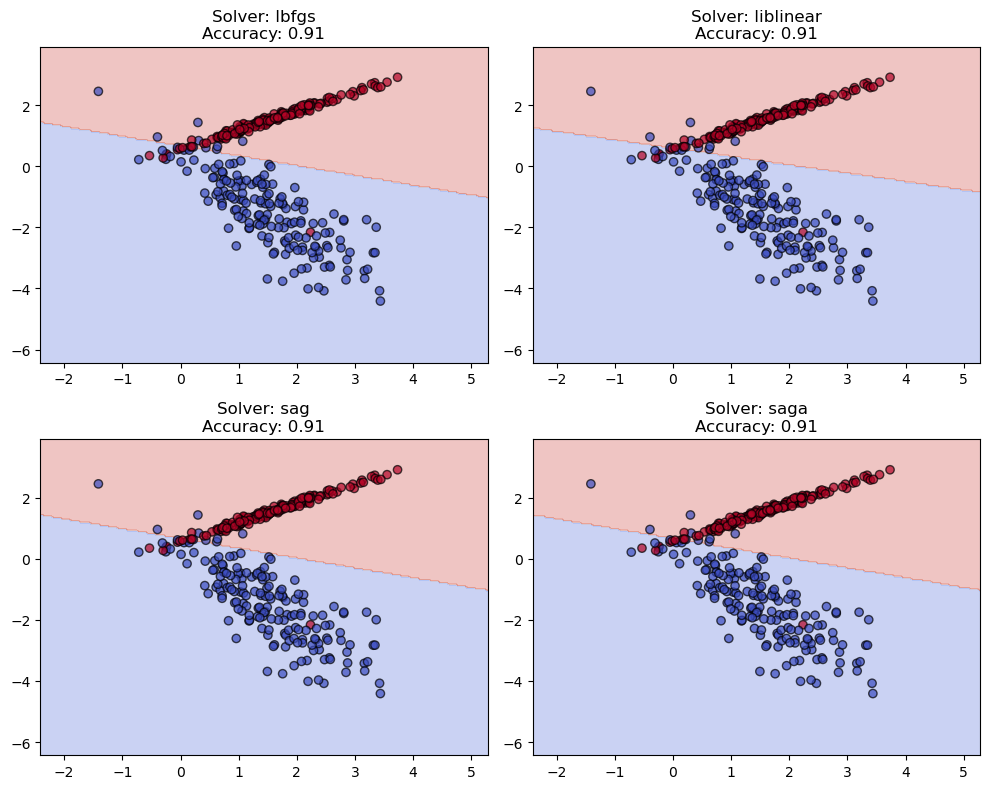

In [27]:
# Plot decision boundaries for each solver
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)
for ax, (solver, data) in zip(axes.flatten(), results.items()):
    Z = data['model'].predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', marker='o', alpha=0.7)
    ax.set_title(f"Solver: {solver}\nAccuracy: {data['accuracy']:.2f}")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>